# Machine Learning Steps:
        1.Define required libraries with which the model will optmised.
        2.Data Cleansing and Wrangling.
        3.Feature Engineering
        4.Data pre-processing
        5.Feature selection
        6.Split the data into training and testing
        7.Model selection
        8.Model validation
        9.Interpret the results

 1.Define required libraries with which the model will optmised.

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from scipy.stats import zscore
from scipy.stats import boxcox-
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [9]:
#importing the data into jupyter notebook

In [11]:
hp=pd.read_csv('Happiness Report.csv')
hp.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [12]:
#Framing it in the DataFrame 
hpd=pd.DataFrame(hp)
#checking for the datatypes and null values in the data
hpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [13]:
#checking the no of rows and columns in the data
hpd.shape

(158, 12)

In [14]:
#other way to check the dtypes
hpd.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [15]:
#other way for checking the null vales in the data
hpd.isnull().sum(), hpd.notnull().sum()

(Country                          0
 Region                           0
 Happiness Rank                   0
 Happiness Score                  0
 Standard Error                   0
 Economy (GDP per Capita)         0
 Family                           0
 Health (Life Expectancy)         0
 Freedom                          0
 Trust (Government Corruption)    0
 Generosity                       0
 Dystopia Residual                0
 dtype: int64,
 Country                          158
 Region                           158
 Happiness Rank                   158
 Happiness Score                  158
 Standard Error                   158
 Economy (GDP per Capita)         158
 Family                           158
 Health (Life Expectancy)         158
 Freedom                          158
 Trust (Government Corruption)    158
 Generosity                       158
 Dystopia Residual                158
 dtype: int64)

In [17]:
#taking out the numeric data from main data set called data wrangling
hpd1=hpd.iloc[:,2:]
hpd1.head(1)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [18]:
hpd1.shape, hpd1.size

((158, 10), 1580)

In [19]:
hpd1.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observations from the above observations
1.in all the fields the mean is almost equal to the 50th percentail i.e median but not exact equal
2.there is no much difference between the percentils
3.std is there but not high in any of the fields.
4. mean and median are not equal and all the percentils are not equally disturbuted there will be skewness exists


In [20]:
hpd1.skew()
#little skwness exists we have to reduce it

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

<AxesSubplot:>

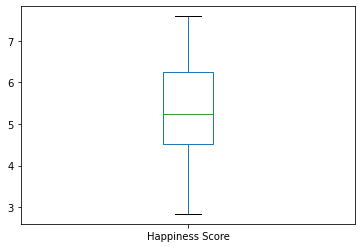

In [24]:
#checking for outliers
#univarient
hpd1['Happiness Score'].plot.box()
#no outliers

<AxesSubplot:>

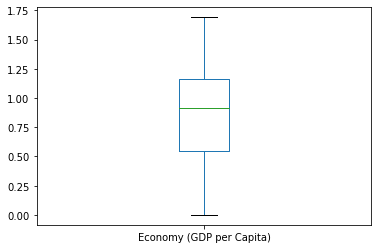

In [25]:
hpd1['Economy (GDP per Capita)'].plot.box()

<AxesSubplot:>

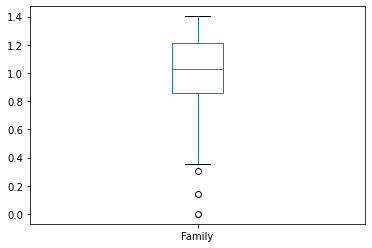

In [26]:
hpd1['Family'].plot.box()

<AxesSubplot:>

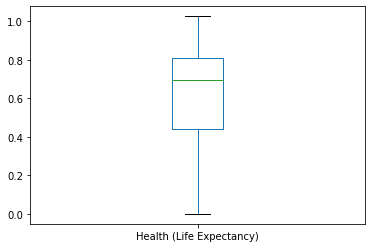

In [27]:
hpd1['Health (Life Expectancy)'].plot.box()

<AxesSubplot:>

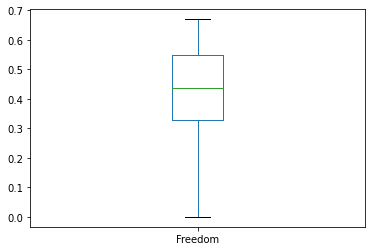

In [28]:
hpd1['Freedom'].plot.box()

<AxesSubplot:>

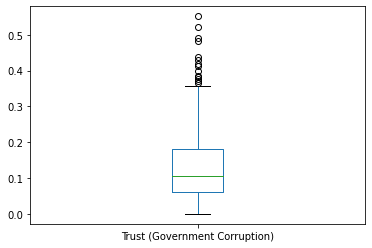

In [29]:
hpd1['Trust (Government Corruption)'].plot.box()

<AxesSubplot:>

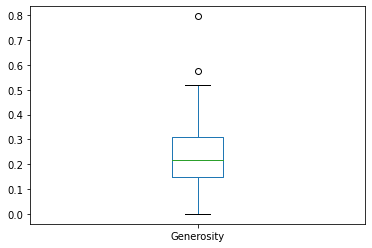

In [30]:
hpd1['Generosity'].plot.box()

<AxesSubplot:>

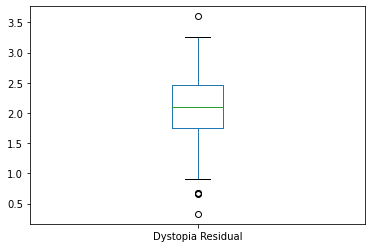

In [31]:
hpd1['Dystopia Residual'].plot.box()

Happiness Rank                      AxesSubplot(0.125,0.536818;0.065678x0.343182)
Happiness Score                  AxesSubplot(0.203814,0.536818;0.065678x0.343182)
Standard Error                   AxesSubplot(0.282627,0.536818;0.065678x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.361441,0.536818;0.065678x0.343182)
Family                           AxesSubplot(0.440254,0.536818;0.065678x0.343182)
Health (Life Expectancy)         AxesSubplot(0.519068,0.536818;0.065678x0.343182)
Freedom                          AxesSubplot(0.597881,0.536818;0.065678x0.343182)
Trust (Government Corruption)    AxesSubplot(0.676695,0.536818;0.065678x0.343182)
Generosity                       AxesSubplot(0.755508,0.536818;0.065678x0.343182)
Dystopia Residual                AxesSubplot(0.834322,0.536818;0.065678x0.343182)
dtype: object

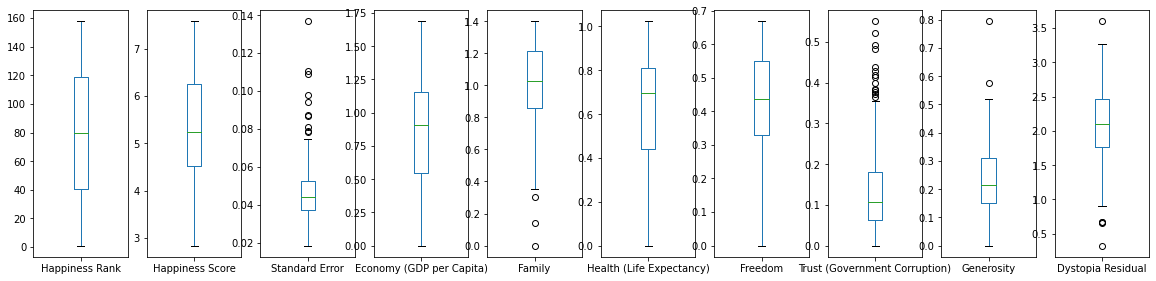

In [32]:
hpd1.plot(kind='box',subplots=True, layout=(2,10), figsize=(20,10))

In [35]:
#finding the zscore
z=np.abs(zscore(hpd1))
z

array([[1.72099989, 1.93736005, 0.80592569, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.69907456, 1.91458063, 0.05588945, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.67714922, 1.88479215, 0.8544869 , ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [1.67742676, 2.0761992 , 0.13253425, ..., 0.38141902, 1.85689094,
        3.20843049],
       [1.69935209, 2.1646885 , 2.26396166, ..., 0.35771452, 0.31694987,
        0.48198451],
       [1.72127743, 2.22251319, 1.13418227, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [99]:
#removing the outliers
hpd2=hpd1[(z<3).all(axis=1)]
hpd2=hpd2.iloc[:,[1,3,4,5,6,7,8,9]]
hpd2

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


<AxesSubplot:>

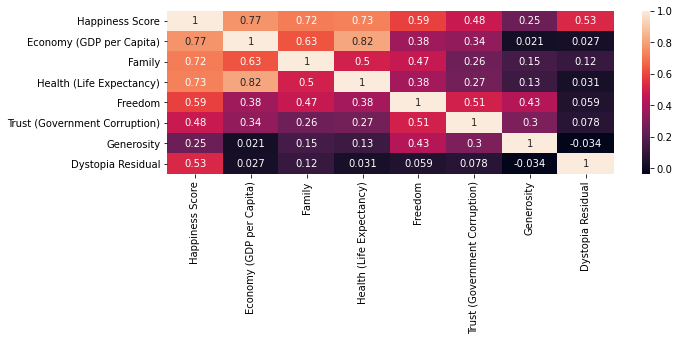

In [102]:
#finding the correlation between the dependent and independent variables
plt.figure(figsize=(10,3))
sns.heatmap(hpd2.corr(), annot=True)

In [44]:
#almost there is a positive corelation between all the independent varibles

In [103]:
hpd2.skew()

Happiness Score                  0.169740
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

Happiness Score                     AxesSubplot(0.125,0.536818;0.065678x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.203814,0.536818;0.065678x0.343182)
Family                           AxesSubplot(0.282627,0.536818;0.065678x0.343182)
Health (Life Expectancy)         AxesSubplot(0.361441,0.536818;0.065678x0.343182)
Freedom                          AxesSubplot(0.440254,0.536818;0.065678x0.343182)
Trust (Government Corruption)    AxesSubplot(0.519068,0.536818;0.065678x0.343182)
Generosity                       AxesSubplot(0.597881,0.536818;0.065678x0.343182)
Dystopia Residual                AxesSubplot(0.676695,0.536818;0.065678x0.343182)
dtype: object

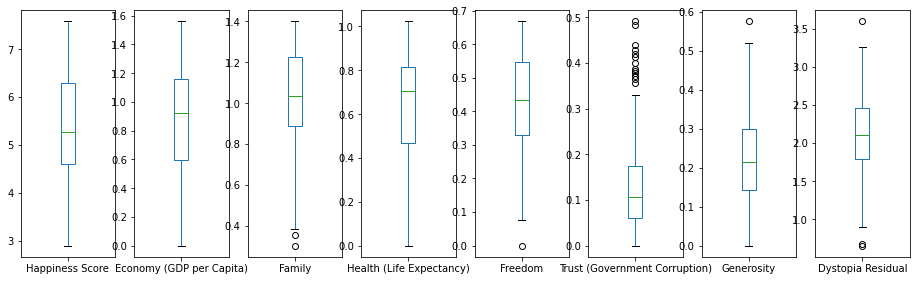

In [192]:
hpd2.plot(kind='box',subplots=True ,layout=(2,10), figsize=(20,10))

In [197]:
#assigning dependent(y) and independent variables(x) 
x=hpd2.iloc[:,1:]
y=hpd2.iloc[:,0]

In [198]:
x.shape,y.shape

((149, 7), (149,))

In [199]:
x.size, y.size, x.ndim, y.ndim

(1043, 149, 2, 1)

In [200]:
#assigning the values for trainng and testing
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.10,random_state=42)

In [124]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((134, 7), (134,), (15, 7), (15,))

In [129]:
#model selection
lm=LinearRegression()

In [130]:
#fitting the values into the model
lm.fit(xtrain,ytrain)

LinearRegression()

In [201]:
#checking the liner regression coefficients(a,b,c,d,e,f,g) y=ax1+bx2+cx3+dx4+ex5+fx6+gx7
lm.coef_

array([1.00007623, 0.99997781, 0.99992492, 0.99960666, 1.00001502,
       1.0000817 , 1.00002521])

In [134]:
# checking the intercept slop
lm.intercept_

9.008154337575291e-05

In [136]:
#checking the output accuracy
lm.score(xtrain,ytrain)

0.9999999368422148

In [140]:
#testing phase
pre=lm.predict(xtest)
pre

array([5.28636226, 6.93733645, 4.5123011 , 5.19230179, 5.2119528 ,
       6.47675825, 5.60464929, 3.78083531, 5.47380603, 5.12418431,
       4.64228702, 7.1998045 , 6.29815309, 7.28399466, 6.90132482])

In [214]:
#checking the error
mar=mean_absolute_error(ytest,pre)
mse=np.sqrt(mean_squared_error(ytest,pre))
mar

0.00023000051518815568

In [204]:
r2_score(ytest,pre)

0.999999939943004

In [205]:
t = np.array([1,1.2,2.2,3.1,1.2,1.5,1.7])
t.shape
t.sum()

11.899999999999999

In [206]:
t=t.reshape(1,-1)
t.shape

(1, 7)

In [213]:
#predecting the happiness score by giving the new inputs
lm.predict(t)

array([11.89893856])